Para a realização desta análise, serão utilizados os datasets "Avocado" e "Avocado_Type", disponíveis na pasta "Data". 

O dataset "Avocado" contém dados sobre vendas de abacates em diversas regiões dos Estados Unidos. Este dataset possui as seguintes colunas:

| Coluna | Descrição |
|--------|-----------|
| Date | data da observação |
| AveragePrice | preço médio de um único abacate |
| year | ano |
| region | cidade ou região da observação |
| Total Volume | volume total de abacates vendidos |

# ETAPA 1 - TRATAMENTO DOS DADOS

Primeiramente, iniciamos importando as bibliotecas e os dois datasets:

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
df_avocado = pd.read_csv("./Data/Avocado.csv", encoding='latin-1', sep=";")
df_avocado_type = pd.read_excel("./Data/Avocado_Type.xlsx") 

Em seguida, verificamos os dados presentes nos dois datasets:

In [4]:
df_avocado.head(5)

,Date,AveragePrice,Total Volume,year,region
0,2015-12-27,1.33,64236.62,2015,Albany
1,2015-12-20,1.35,54876.98,2015,Albany
2,2015-12-13,0.93,118220.22,2015,Albany
3,2015-12-06,1.08,78992.15,2015,Albany
4,2015-11-29,1.28,51039.60,2015,Albany


In [5]:
df_avocado_type.head(5)

,type
0,orgânico
1,convencional
2,convencional
3,orgânico
4,orgânico


Percebe-se que os dois datasets são complementares. Desta forma, serão concatenados lado a lado utilizando o método "concat":

In [6]:
full_df = df = pd.concat([df_avocado, df_avocado_type], axis = 1, join = "outer")
full_df.head(5)

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.33,64236.62,2015,Albany,orgânico
1,2015-12-20,1.35,54876.98,2015,Albany,convencional
2,2015-12-13,0.93,118220.22,2015,Albany,convencional
3,2015-12-06,1.08,78992.15,2015,Albany,orgânico
4,2015-11-29,1.28,51039.60,2015,Albany,orgânico


Uma vez que o datasset está completo, percebe-se que a coluna type destoa das demais por estar em português, enquanto o restante dos dados está em inglês e capitalizado. Desta forma, os dados em português serão substituídos por seus valores em inglês:

In [7]:
full_df['type'].replace({'orgânico':'Organic','convencional':'Conventional'},inplace=True)

In [8]:
full_df.head(5)

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.33,64236.62,2015,Albany,Organic
1,2015-12-20,1.35,54876.98,2015,Albany,Conventional
2,2015-12-13,0.93,118220.22,2015,Albany,Conventional
3,2015-12-06,1.08,78992.15,2015,Albany,Organic
4,2015-11-29,1.28,51039.60,2015,Albany,Organic


Verificamos a presença de dados nulos ou duplicados:

In [9]:
full_df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
year            0
region          0
type            0
dtype: int64

In [10]:
full_df.duplicated().sum()

0

Em sequência, será feita a padronização dos nomes das colunas, com _ como espaço e com palavras capitalizadas:

In [11]:
full_df.columns = [ "Date", "Average_Price", "Total_Volume", "Year", "Region", "Type"]
full_df.head(5)

,Date,Average_Price,Total_Volume,Year,Region,Type
0,2015-12-27,1.33,64236.62,2015,Albany,Organic
1,2015-12-20,1.35,54876.98,2015,Albany,Conventional
2,2015-12-13,0.93,118220.22,2015,Albany,Conventional
3,2015-12-06,1.08,78992.15,2015,Albany,Organic
4,2015-11-29,1.28,51039.60,2015,Albany,Organic


    Sem mais tratamentos a fazer neste momento, é dado início às análises.

# ETAPA 2 - ANÁLISES

##### O objetivo desta análise será a verificação da variação no custo unitário dos abacates ao longo do tempo em cada região, e se tal variação ocasionou alguma mudança no volume total vendido para tal região.

Vamos iniciar verificando qual a diferença na média do custo unitário do tipo orgânico para o convencional ao longo dos anos, para verificar se há alguma diferença entre os dois tipos:

In [12]:
full_df.groupby(['Type','Year'])['Average_Price'].mean()

Type          Year
Conventional  2015    1.369188
              2016    1.335151
              2017    1.516195
              2018    1.344483
Organic       2015    1.382110
              2016    1.342084
              2017    1.514059
              2018    1.350405
Name: Average_Price, dtype: float64

<AxesSubplot:xlabel='Year'>

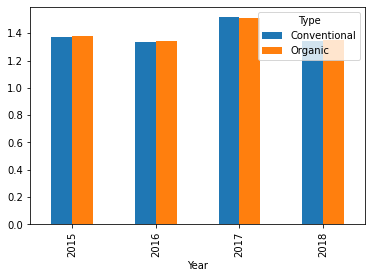

In [34]:
full_df.groupby(['Year','Type'])['Average_Price'].mean().unstack().plot(kind='bar')

    Percebe-se que a diferença no custo unitário do tipo convencional para o tipo orgânico é irrisória, chegando ao máximo de 1 centavo. Neste caso, essa diferença entre os tipos será desconsiderada neste momento 

Vejamos como o custo unitário se comporta ao longo dos anos:

In [29]:
full_df.groupby(['Year'])['Average_Price'].mean()

Year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: Average_Price, dtype: float64

Percebe-se um grande aumento na média de preços unitários no ano de 2017. Buscando uma melhor visualização, buscaremos a representação destes valores em base diária em um gráfico. Dada a grande quantidade de dados, o gráfico será construído com a ferramenta plotly:

In [46]:
fig=px.line(x=full_df.groupby(['Date'])['Average_Price'].mean().index, y=full_df.groupby(['Date'])['Average_Price'].mean(), title='Média do Valor Unitário dos Abacates por Data')
fig.update_layout(xaxis_title='Data',
    yaxis_title="Valor unitário médio",
    title={
        'y':0.85,
        'x':0.5,
        'font_family': 'Times New Roman',
        'font_color': 'black'
    })

    Percebe-se uma tendência de altas nas datas próximas a setembro e outubro. Uma possível explicação para este dado é a sazonalidade do fruto, que tem sua entresafra nos meses finais do ano, causando uma redução na oferta. 

Verificaremos então como se comportam os volumes totais das vendas nestas mesmas datas:

In [50]:
fig=px.line(x=full_df.groupby(['Date'])['Total_Volume'].sum().index, y=full_df.groupby(['Date'])['Total_Volume'].sum(), title='Vendas Totais de Abacates por Data')
fig.update_layout(xaxis_title='Data',
    yaxis_title="Volume Total Vendido",
    title={
        'y':0.85,
        'x':0.5,
        'font_family': 'Times New Roman',
        'font_color': 'black'
    })

    Neste ponto, é perceptível a queda nas vendas de abacates nos períodos de alta de preços, o que pode levar à conclusão de que este alimento é substituído por outros financeiramente mais agradáveis durante estes períodos. Por outro lado, há um grande pico no consumo nos primeiros dias de fevereiro. Essa alta na demanda coincide com a final do maior evento esportivo dos EUA: o SuperBowl. Nesta época, com a aglomeração de grande parte da população para acompanhar o evento, há também um grande consumo de guacamole, tradicional receita mexicana à base de abacate bastante consumida pelos americanos em tais ocasiões.